# Tensorflow Tutorial

#### Example 1
https://www.tensorflow.org/tutorials/quickstart/beginner

In [1]:
#Library imports
import tensorflow as tf
model = tf.keras.Sequential() #keras API

In [2]:
#Imports
#!pip install tensorflow

In [3]:
#Check version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.6.1


In [4]:
#Data
mnist = tf.keras.datasets.mnist

mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\klam\\Anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
#Build keras model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [7]:
predictions = model(x_train[:1]).numpy()
predictions #model returns a vector of logits or log-odds scores, one for each class

array([[-0.2739767 ,  0.29136273, -0.4203698 ,  0.37302527,  0.4520656 ,
        -0.01037215, -0.14373109,  0.00919603,  0.18400262, -0.25257653]],
      dtype=float32)

In [8]:
#Converts logits to probabilities for each class
tf.nn.softmax(predictions).numpy()

array([[0.07157624, 0.12597741, 0.06182885, 0.13669677, 0.1479398 ,
        0.09316459, 0.08153307, 0.09500561, 0.11315318, 0.07312449]],
      dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
loss_fn(y_train[:1], predictions).numpy()

2.3733876

In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2969 - accuracy: 0.9143
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1421 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1049 - accuracy: 0.9689
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0889 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0741 - accuracy: 0.9769


In [13]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0723 - accuracy: 0.9795


[0.07234002649784088, 0.9794999957084656]

#### Example 2
https://www.tensorflow.org/tutorials/keras/classification

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [18]:
print(len(train_labels))
print(len(test_labels))

60000
10000


In [19]:
print(train_labels)
print(test_labels)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


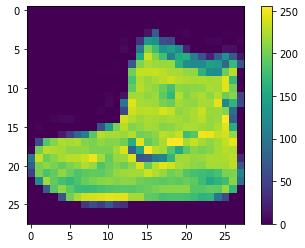

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

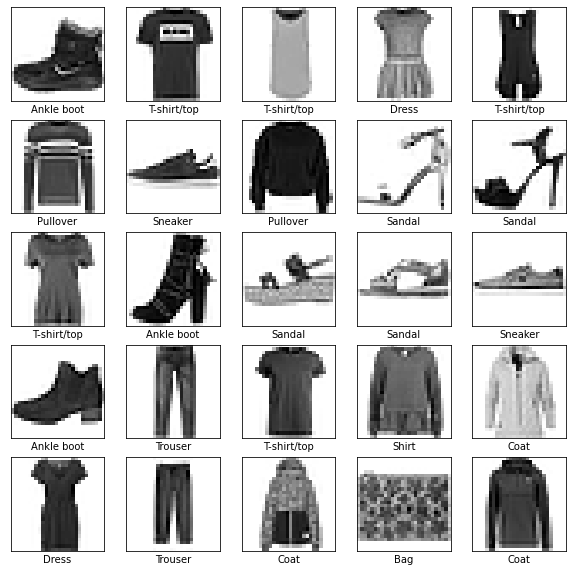

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
#Build model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4963 - accuracy: 0.8265
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3761 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3340 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3135 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2970 - accuracy: 0.8913
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2818 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2694 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2582 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2496 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3409 - accuracy: 0.8812

Test accuracy: 0.8812000155448914


In [27]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [28]:
predictions = probability_model.predict(test_images)

In [29]:
predictions[0]

array([3.7143295e-07, 1.1708384e-07, 6.7376865e-10, 1.2057262e-10,
       5.7916164e-08, 5.5795209e-03, 1.3911603e-08, 2.1052115e-02,
       2.2228463e-07, 9.7336751e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])

9

In [31]:
test_labels[0]

9

In [32]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                  class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

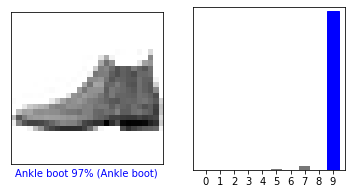

In [33]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

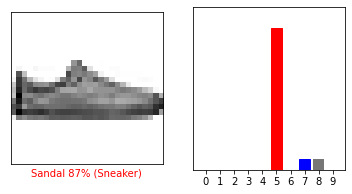

In [34]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

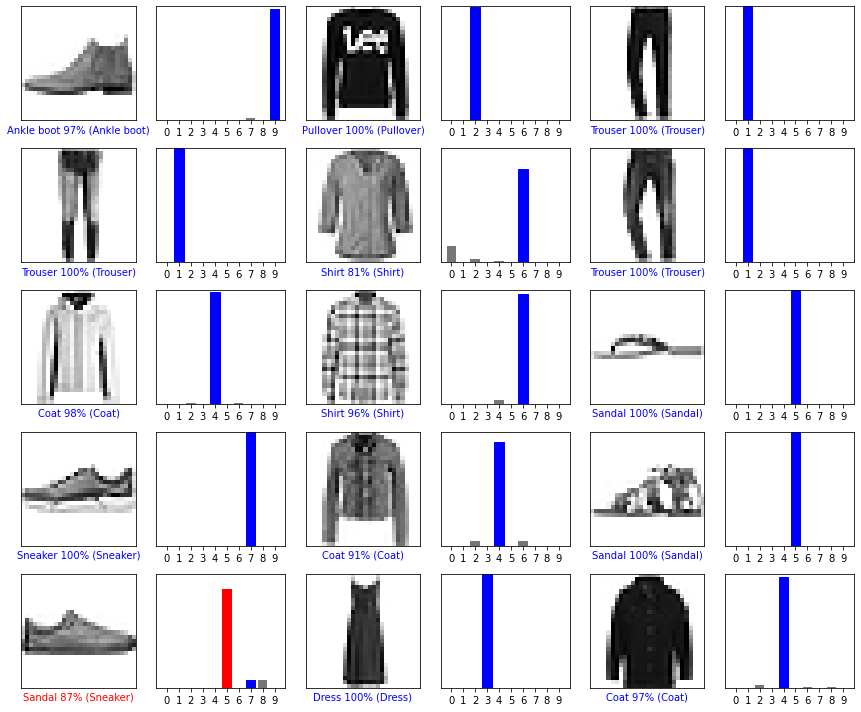

In [35]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [36]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [37]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [38]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.3528460e-05 1.2199864e-13 9.9757832e-01 9.7065057e-11 1.9188403e-03
  3.1594935e-14 4.5930914e-04 2.2556429e-17 5.9249130e-09 9.1643707e-13]]


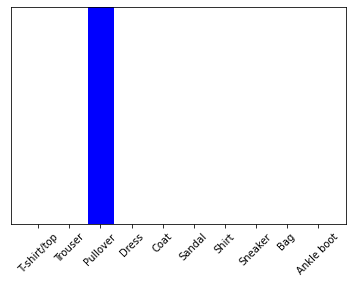

In [39]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [40]:
np.argmax(predictions_single[0])

2

#### Example 3
https://www.tensorflow.org/tutorials/load_data/csv

In [41]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

In [42]:
#Data
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


In [43]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

In [44]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

In [45]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                      optimizer = tf.optimizers.Adam())

In [46]:
abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 1ms/step - loss: 62.1239
Epoch 2/10
104/104 [==============================] - 0s 1ms/step - loss: 11.8022
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 8.5497
Epoch 4/10
104/104 [==============================] - 0s 3ms/step - loss: 8.0685
Epoch 5/10
104/104 [==============================] - 0s 3ms/step - loss: 7.6278
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 7.2853
Epoch 7/10
104/104 [==============================] - 0s 2ms/step - loss: 7.0149
Epoch 8/10
104/104 [==============================] - 0s 2ms/step - loss: 6.8277
Epoch 9/10
104/104 [==============================] - 0s 2ms/step - loss: 6.6868
Epoch 10/10
104/104 [==============================] - 0s 2ms/step - loss: 6.6013


In [47]:
normalize = layers.Normalization()

In [48]:
normalize.adapt(abalone_features)

In [49]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.losses.MeanSquaredError(),
                           optimizer = tf.optimizers.Adam())

norm_abalone_model.fit(abalone_features, abalone_labels, epochs=10)

Epoch 1/10
104/104 [==============================] - 1s 3ms/step - loss: 92.9616
Epoch 2/10
104/104 [==============================] - 0s 2ms/step - loss: 54.7229
Epoch 3/10
104/104 [==============================] - 0s 2ms/step - loss: 17.6724
Epoch 4/10
104/104 [==============================] - 0s 2ms/step - loss: 5.9228
Epoch 5/10
104/104 [==============================] - 0s 2ms/step - loss: 5.0113
Epoch 6/10
104/104 [==============================] - 0s 2ms/step - loss: 4.9528
Epoch 7/10
104/104 [==============================] - 0s 639us/step - loss: 4.9235
Epoch 8/10
104/104 [==============================] - 0s 639us/step - loss: 4.9329
Epoch 9/10
104/104 [==============================] - 0s 620us/step - loss: 4.9496
Epoch 10/10
104/104 [==============================] - 0s 688us/step - loss: 4.9032


#### Example 4
https://www.tensorflow.org/tutorials/keras/text_classification

In [50]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses

In [51]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url, untar=True, cache_dir='.', cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

84140032/84125825 [==============================] - 67s 1us/step


In [52]:
os.listdir(dataset_dir)

['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [53]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsup',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [54]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
    print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [55]:
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

In [56]:
batch_size = 32
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory('aclImdb/train', batch_size=batch_size, validation_split=0.2, 
                                                          subset='training', seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [57]:
for text_batch, label_batch in raw_train_ds.take(1):
    for i in range(3):
        print("Review", text_batch.numpy()[i])
        print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [58]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


In [59]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory('aclImdb/train', batch_size=batch_size, 
                                                        validation_split=0.2, subset='validation', seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [60]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory('aclImdb/test', batch_size=batch_size)

Found 25000 files belonging to 2 classes.


In [61]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
    return tf.strings.regex_replace(stripped_html, '[%s]' % re.escape(string.punctuation), '')

In [62]:
max_features = 10000
sequence_length = 250

vectorize_layer = layers.TextVectorization(standardize=custom_standardization, max_tokens=max_features,
                                           output_mode='int', output_sequence_length=sequence_length)

In [63]:
# Make a text-only dataset (without labels), then call adapt
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [64]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

In [65]:
# retrieve a batch (of 32 reviews and labels) from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  85,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2421,
           1,   51,   22,   25,  404,  251,   12,  308,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [66]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[1287])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  lovely
 313 --->  american
Vocabulary size: 10000


In [67]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [68]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [69]:
#Creating model
embedding_dim = 16

In [70]:
model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.2),
  layers.Dense(1)])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True), optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [72]:
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
625/625 [==============================] - 12s 18ms/step - loss: 0.6651 - binary_accuracy: 0.6927 - val_loss: 0.6168 - val_binary_accuracy: 0.7664
Epoch 2/10
625/625 [==============================] - 2s 4ms/step - loss: 0.5498 - binary_accuracy: 0.8001 - val_loss: 0.4998 - val_binary_accuracy: 0.8208
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.4462 - binary_accuracy: 0.8429 - val_loss: 0.4216 - val_binary_accuracy: 0.8452
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3794 - binary_accuracy: 0.8655 - val_loss: 0.3749 - val_binary_accuracy: 0.8598
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3365 - binary_accuracy: 0.8773 - val_loss: 0.3459 - val_binary_accuracy: 0.8674
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3064 - binary_accuracy: 0.8891 - val_loss: 0.3267 - val_binary_accuracy: 0.8718
Epoch 7/10
625/625 [==============================] - 3s 5ms/s

In [73]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 11s 14ms/step - loss: 0.3107 - binary_accuracy: 0.8726
Loss:  0.3106507658958435
Accuracy:  0.8725600242614746


In [74]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

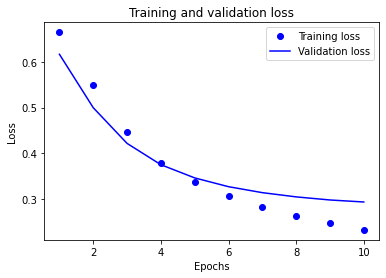

In [75]:
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

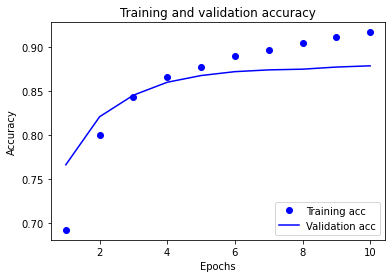

In [76]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [77]:
export_model = tf.keras.Sequential([vectorize_layer, model, layers.Activation('sigmoid')])

export_model.compile(loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy'])

# Test it with `raw_test_ds`, which yields raw strings
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

782/782 [==============================] - 12s 15ms/step - loss: 0.3107 - accuracy: 0.87260s - loss: 0.3105 - accuracy: 
0.8725600242614746


In [78]:
examples = ["The movie was great!", "The movie was okay.", "The movie was terrible..."]
export_model.predict(examples)

array([[0.596],
       [0.418],
       [0.336]], dtype=float32)